In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-23 20:21:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-07-23 20:21:37 (9.93 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train'.
There are 0 directories and 3680 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train/Normal'.
There are 0 directories and 3596 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train/Malignant'.
There are 0 directories and 3527 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train/Benign'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test'.
There are 0 directories and 60 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test/Benign'.
There are 0 directories and 66 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test/Malignant'.
There are 0 directories and 77 images in '/content/dr

In [4]:
train_dir = "/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train"
test_dir = "/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test"

In [5]:
import tensorflow as tf
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                          label_mode= "categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                          label_mode="categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

Found 10803 files belonging to 3 classes.
Found 203 files belonging to 3 classes.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [7]:
import tensorflow as tf

# 1. create base model with tf.keras.applications
base_model = tf.keras.applications.VGG16(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

# 3. create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. if using ResNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. create the output activation layer for 3 classes
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs)

# 8. compile the model for 3 classes
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Assuming you have already prepared your train_data and test_data
# Make sure that train_data and test_data are prepared with class_mode='categorical'

# 9. fit the model
history_0 = model_0.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="3_class_feature_extraction")])


58889256/58889256 [==============================] - 3s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 512)
Shape after GlobalAveragePooling2D: (None, 512)
Saving TensorBoard log files to: transfer_learning/3_class_feature_extraction/20240723-202241
Epoch 1/40
338/338 [==============================] - 985s 3s/step - loss: 1.3765 - accuracy: 0.4326 - val_loss: 1.2430 - val_accuracy: 0.4335
Epoch 2/40
338/338 [==============================] - 43s 125ms/step - loss: 1.0715 - accuracy: 0.4987 - val_loss: 1.0880 - val_accuracy: 0.4778
Epoch 3/40
338/338 [==============================] - 44s 128ms/step - loss: 0.9801 - accuracy: 0.5335 - val_loss: 1.0148 - val_accuracy: 0.5172
Epoch 4/40
338/338 [==============================] - 45s 132ms/step - loss: 0.9425 - accuracy: 0.5535 - val_loss: 1.0333 - val_accuracy: 0.5172
Epoch 5/40
338/338 [==============================] - 46s 135ms/step - loss: 0.9148 - accuracy: 0.5650 - val_loss: 1.0372 - val_accuracy: 0.5222
Epoch

In [8]:
# Evaluate the model on the test data
results_feature_extraction = model_0.evaluate(test_data)
results_feature_extraction

7/7 [==============================] - 2s 120ms/step - loss: 1.0194 - accuracy: 0.4975


[1.0193895101547241, 0.49753695726394653]

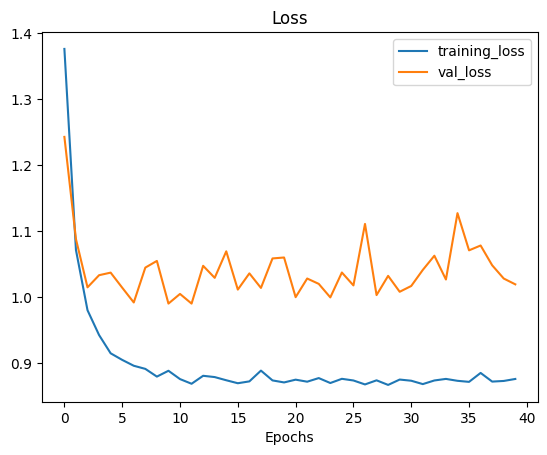

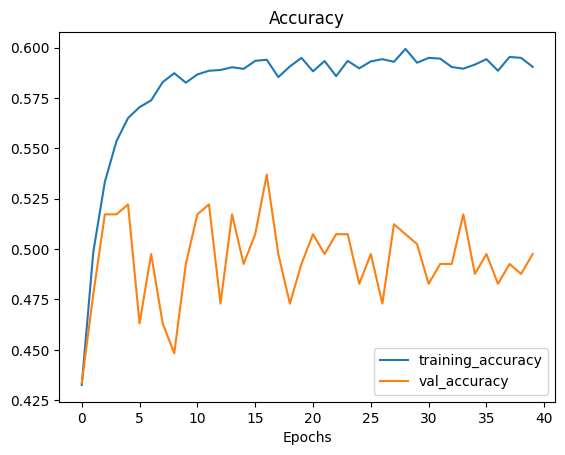

In [9]:
plot_loss_curves(history_0)

In [10]:
from sklearn.metrics import classification_report

# Assuming you have true labels for your test data stored in y_true
# and predictions from your model stored in y_pred

# Convert categorical predictions to class labels
y_pred_labels = np.argmax(model_0.predict(test_data), axis=1)

# Get true labels from the test dataset
y_true_labels = np.concatenate([y for x, y in test_data], axis=0)
y_true_labels = np.argmax(y_true_labels, axis=1)

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels)

print(report)

7/7 [==============================] - 2s 134ms/step
              precision    recall  f1-score   support

           0       0.44      0.42      0.43        60
           1       0.26      0.24      0.25        66
           2       0.33      0.36      0.35        77

    accuracy                           0.34       203
   macro avg       0.34      0.34      0.34       203
weighted avg       0.34      0.34      0.34       203

